In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load csv file
df = pd.read_csv('NABBC.csv')

In [3]:
df

,published_date,open,high,low,close,per_change,traded_quantity,traded_amount,status
0,2011-05-08,461.0,452.0,452.0,452.0,NaN,455.0,205660.0,0
1,2011-06-23,452.0,443.0,435.0,435.0,-3.76,44.0,19316.0,0
2,2013-11-28,435.0,427.0,427.0,427.0,-1.84,340.0,145180.0,0
3,2013-12-26,427.0,443.0,435.0,443.0,3.75,510.0,223890.0,0
4,2014-01-06,443.0,435.0,435.0,435.0,-1.81,219.0,95265.0,0
...,...,...,...,...,...,...,...,...,...
1218,2026-02-22,1389.7,1413.9,1282.0,1320.0,-6.91,30096.0,40367058.5,-1
1219,2026-02-23,1293.6,1360.0,1270.4,1360.0,3.03,85434.0,114390217.4,1
1220,2026-02-24,1332.8,1477.0,1332.8,1430.0,5.15,9232.0,13269687.6,1
1221,2026-02-25,1450.4,1477.0,1420.0,1420.0,-0.70,42625.0,61441339.1,-1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   published_date   1223 non-null   object 
 1   open             1223 non-null   float64
 2   high             1223 non-null   float64
 3   low              1223 non-null   float64
 4   close            1223 non-null   float64
 5   per_change       1222 non-null   float64
 6   traded_quantity  1223 non-null   float64
 7   traded_amount    1223 non-null   float64
 8   status           1223 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 86.1+ KB


In [5]:
df.isnull().sum()

published_date     0
open               0
high               0
low                0
close              0
per_change         1
traded_quantity    0
traded_amount      0
status             0
dtype: int64

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1218    False
1219    False
1220    False
1221    False
1222    False
Length: 1223, dtype: bool

In [7]:
df.duplicated().sum()

2

In [8]:
df.drop_duplicates(inplace=True)

In [10]:
# 2. Convert the Date column to datetime format
df['published_date'] = pd.to_datetime(df['published_date'])


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1221 entries, 0 to 1222
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   published_date   1221 non-null   datetime64[ns]
 1   open             1221 non-null   float64       
 2   high             1221 non-null   float64       
 3   low              1221 non-null   float64       
 4   close            1221 non-null   float64       
 5   per_change       1220 non-null   float64       
 6   traded_quantity  1221 non-null   float64       
 7   traded_amount    1221 non-null   float64       
 8   status           1221 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 95.4 KB


In [13]:
# 3. Sort by Date (important for time-series plotting)
df = df.sort_values('published_date')


In [14]:
df

,published_date,open,high,low,close,per_change,traded_quantity,traded_amount,status
0,2011-05-08,461.0,452.0,452.0,452.0,NaN,455.0,205660.0,0
1,2011-06-23,452.0,443.0,435.0,435.0,-3.76,44.0,19316.0,0
2,2013-11-28,435.0,427.0,427.0,427.0,-1.84,340.0,145180.0,0
3,2013-12-26,427.0,443.0,435.0,443.0,3.75,510.0,223890.0,0
4,2014-01-06,443.0,435.0,435.0,435.0,-1.81,219.0,95265.0,0
...,...,...,...,...,...,...,...,...,...
1218,2026-02-22,1389.7,1413.9,1282.0,1320.0,-6.91,30096.0,40367058.5,-1
1219,2026-02-23,1293.6,1360.0,1270.4,1360.0,3.03,85434.0,114390217.4,1
1220,2026-02-24,1332.8,1477.0,1332.8,1430.0,5.15,9232.0,13269687.6,1
1221,2026-02-25,1450.4,1477.0,1420.0,1420.0,-0.70,42625.0,61441339.1,-1


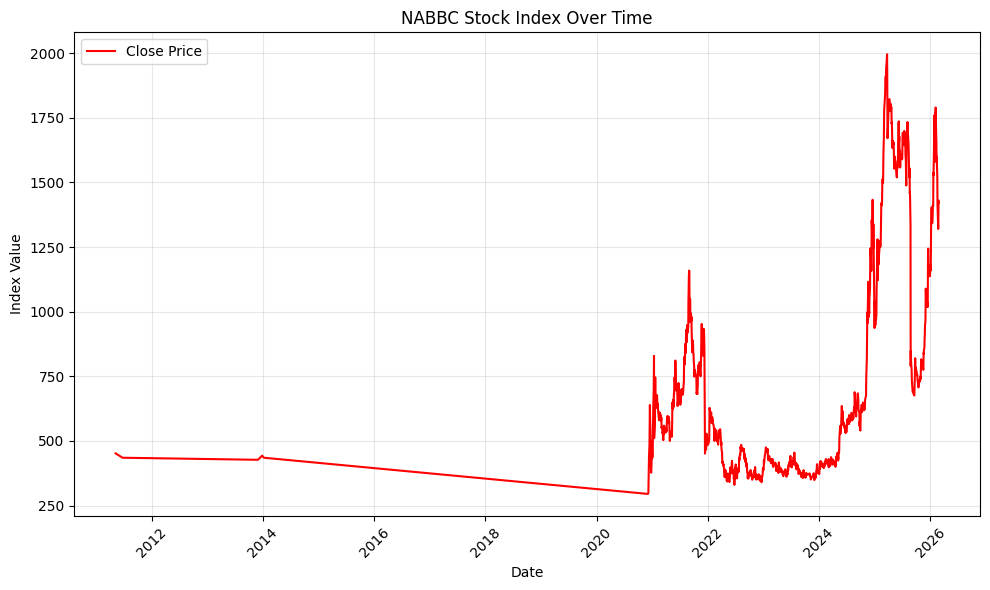

In [23]:
# 4. Plot Close price vs Date
plt.figure(figsize=(10, 6))
plt.plot(df['published_date'], df['close'], label='Close Price',color='Red')

# 5. Add title and labels
plt.title('NABBC Stock Index Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')

# 6. Add grid and legend
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=45)

# 7. Show the plot
plt.tight_layout()
plt.show()